<a href="https://colab.research.google.com/github/dak-sh-kim/selfstudy-wikidocs-tensorflow-nlp-tutorial-notebooks/blob/main/20220610_NLP_2_03)_Stemming%26Lemmatization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03) 어간추출(Stemming) and 표제어 추출(Lemmatization)

- 눈으로 봤을 때 서로 다른 단어를, 일반화 시킬 수 있다면 일반화 시켜서 문서 내의 단어 수를 줄이겠다는 목적
- 단어 빈도수 기반 문제에서 유용하게 사용 (ex. Bag of Words)
- 자연어처리에서 전처리(더 정확히는 정규화) 지향점: corpus 복잡성 줄이는 일

## 1. 표제어 추출(Lemmatization) - 기본 사전형 단어

+ 뿌리단어 찾기임
+ ex. am, are, is --> be
+ 가장 섬세한 방법은 단어의 형태학적 파싱을 먼저 진행하는 것
+ 즉, 형태소 추출하는 것.

형태학적 파싱이란
+ 어간(stem-단어의 핵심부분) + 접사(affix-단어의 추가적 의미)
+ ex. cats --> cat + s

### 표제어 추출 예제 (WordNetLemmatizer)

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

In [ ]:
print("표제어 추출 전: ", words)
print("표제어 추출 후: ", [lemmatizer.lemmatize(word) for word in words])
print("표제어: 단어의 형태가 적절히 보존 cf. 어간추출: 보존X")
print("'dy', 'ha' 등 오류: lemmatizer는 본래 단어의 품사 정보를 알아야 정확한 결과 얻음")

표제어 추출 전:  ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후:  ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']
표제어: 단어의 형태가 적절히 보존 cf. 어간추출: 보존X
'dy', 'ha' 등 오류: lemmatizer는 본래 단어의 품사 정보를 알아야 정확한 결과 얻음


In [ ]:
# WordNetLemmatizer: 입력을 통해 해당 단어의 품사를 알려줄 수 있음
lemmatizer.lemmatize('dies', 'v')

'die'

In [ ]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [ ]:
lemmatizer.lemmatize('has','v')

'have'

## 2. 어간 추출 (Stemming)

- 형태학적 분석을 단순화한 버전이라고 볼 수도
- 정해진 규칙만 보고 단어 어미를 자르는 어림짐작의 작업이라 볼 수도 
- 섬세하지 않기 때문에 결과 단어가 사전에 없을 수도 있음

### 어간 추출 예제 - 포터알고리즘(Porter Algorithm)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = PorterStemmer()

In [ ]:
sentence = """This was not the map we found in Billy Bones's chest,
nbut an accurate copy, complete in all things--names and heights and soundings--
nwith the single exception of the red crosses and the written notes."""
tokenized_sentence = word_tokenize(sentence)
print(sentence)

This was not the map we found in Billy Bones's chest,
nbut an accurate copy, complete in all things--names and heights and soundings--
nwith the single exception of the red crosses and the written notes.


In [ ]:
print("어간 추출 전: ", tokenized_sentence)
print("어간 추출 후: ", [stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전:  ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후:  ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


포터알고리즘의 규칙
+ ~alize --> ~al ; formalize --> formal
+ ~ance --> 제거 ; allowance --> allow
+ ~ical --> ic ; electrical --> electric

In [ ]:
words = ['formalized', 'allowance', 'electrical']
print("어간 추출 전: ", words)
print("어간 추출 후: ", [stemmer.stem(word) for word in words])

어간 추출 전:  ['formalized', 'allowance', 'electrical']
어간 추출 후:  ['formal', 'allow', 'electr']


- stemmer 속도가 lemmatizer보다 일반적으로 빠름
- PorterStemmer: 정밀하게 설계되어 정확도가 높아 영어NLP에서 준수한 선택임
- LancasterStemmer: nltk상의 또다른 스태머알고리즘. 

### 어간 추출 예제 - 포터알고리즘(Porter Algorithm) vs 랠커스터 스태머 (Lancaster Stemmer)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [ ]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

In [ ]:
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

In [ ]:
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


- 이런 규칙기반 알고리즘은 종종 제대로된 일반화 수행 못할 수 있다. (지나치게 되거나 or 덜 되거나)
- ex. PorterStemmer; organization --> organ

### 어간 추출 vs 표제어 추출

Stemming
+ am → am
+ the going → the go
+ having → hav

Lemmatization
+ am → be
+ the going → the going
+ having → have

## 3. 한국어에서의 어간 추출

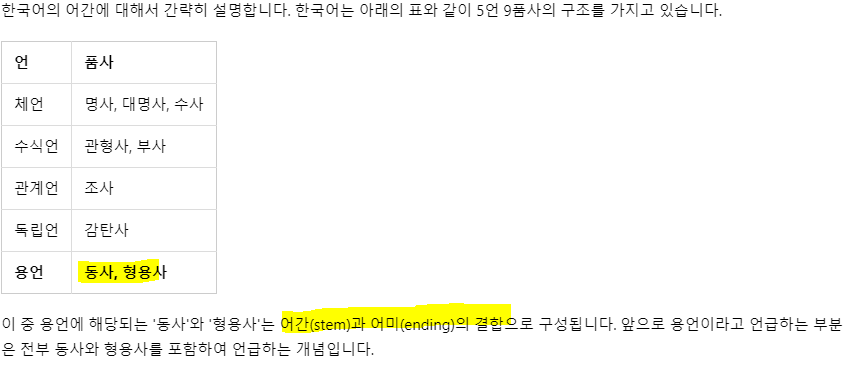

#### 1) 활용 (conjugation)

어간 Stem
+ 동사/형용사 활용 시 원칙적으로 모양 변하지 않는 부분
+ 활용에서 어미에 선행하는 부분
+ 때론 어간의 모양도 바뀔 수 있음 (ex. 긋다. 긋고. 그어서. 그어라)

어미 Ending
+ 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분, 여러 문법적 기능 수행
+ 활용은 규칙/불규칙 두종류

#### 2) 규칙 활용

어간+어미 일 때, 어간 모습 일정 
- ex. 잡/어간  +  다(어미)
- 어미 붙기 전 후 어간 모습 차이 없으므로 단순 규칙 적용 가능

#### 3) 불규칙 활용

어간의 형식이 달라짐
- ‘듣-, 돕-, 곱-, 잇-, 오르-, 노랗-’ 등이 ‘듣/들-, 돕/도우-, 곱/고우-, 잇/이-, 올/올-, 노랗/노라-'
- '오르+ 아/어→올라, 하+아/어→하여, 이르+아/어→이르러, 푸르+아/어→푸르러’